### IMPORTS

In [1]:
# IMPORTING NECESSARY MODULES
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import mrcnn.utils
import mrcnn.model as modellib
import cv2
import os
import sys
import random
import math
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import pickle



import tensorflow as tf
print('Tensorflow Version: ',tf.__version__)
import h5py
print('h5py Version: ',h5py.__version__) 

Using TensorFlow backend.


Tensorflow Version:  2.2.0
h5py Version:  2.10.0


### LOADING MASK RCNN MODEL

In [5]:
MODEL_DIR = './logs/mask_RCNN_logs/'
COCO_MODEL_PATH = './data/weights/mask_rcnn_coco.h5'
IMG_DIR = './data/aoa_data'
RESULTS_DIR = './results/images'

# Class Names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

class InferenceConfig(mrcnn.config.Config):
    # Name of the Configuration
    NAME = 'coco_inference'

    # GPU Parameters
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of class = number of classes +1(Background)
    NUM_CLASSES = len(class_names)

config = InferenceConfig()

# Initialize the Mask R-CNN model for inference and then load the weights.
model = mrcnn.model.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)

# Load the weights into the model.
model.load_weights(filepath=COCO_MODEL_PATH, by_name=True)

### DEMO

Processing 1 images
image                    shape: (512, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


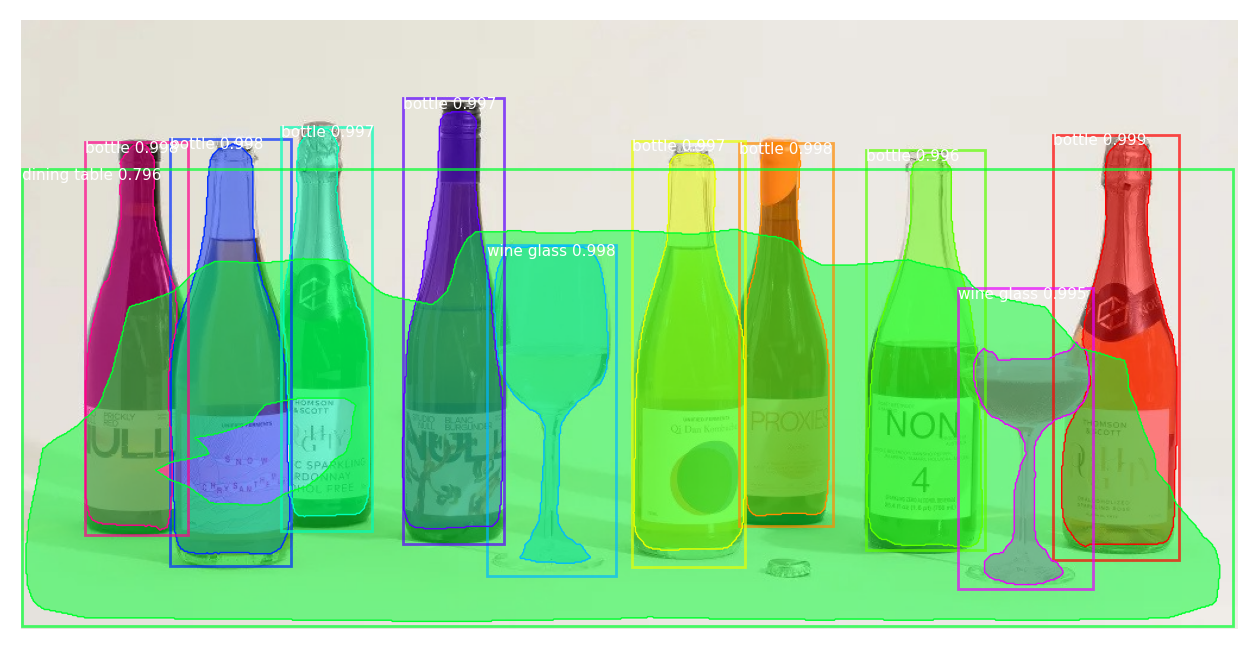

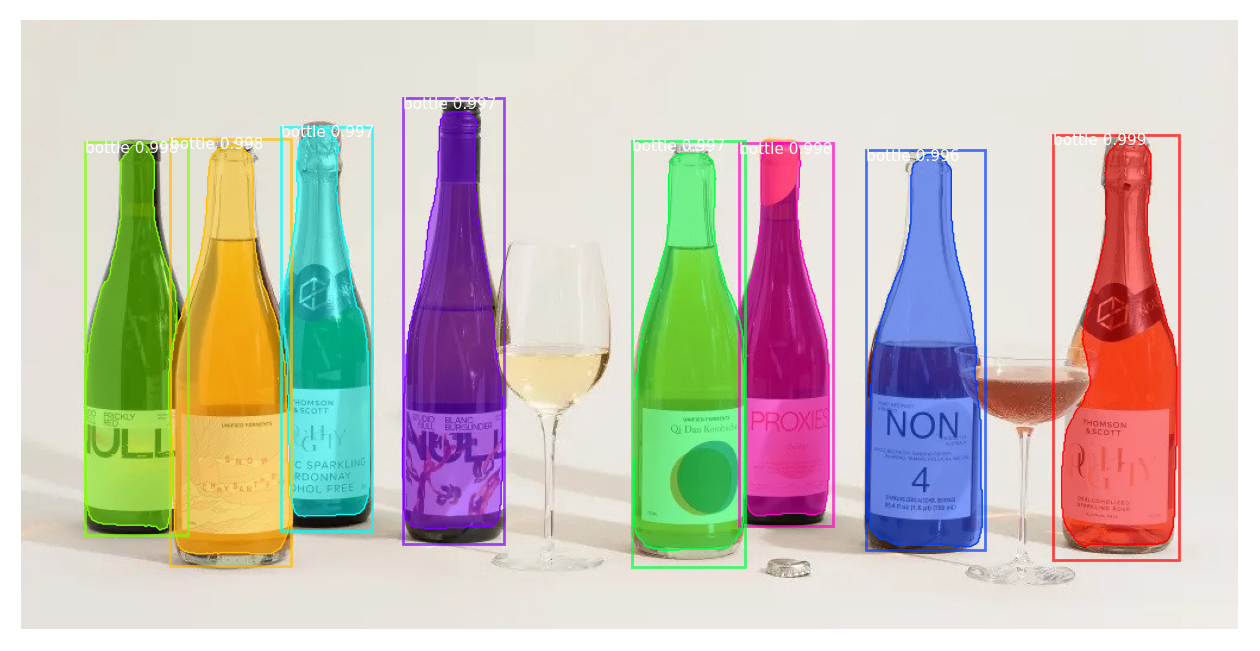

In [7]:

# LOADING A RANDOM IMAGE
# file_names = next(os.walk(IMG_DIR))[2]
# file_name = random.choice(file_names)
file_name = './data/demo/mask_RCNN.jpg'
image = skimage.io.imread(file_name)


# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=1)

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                boxes=r['rois'], 
                                masks=r['masks'], 
                                class_ids=r['class_ids'], 
                                class_names=class_names, 
                                scores=r['scores'])

# VISUALIZING ONLY THE BOTTLES
bottle_index = np.array([i for (i, item) in enumerate(r['class_ids']) if class_names[item]=='bottle' ])
mrcnn.visualize.display_instances(image, r['rois'][bottle_index], r['masks'][:,:,bottle_index],r['class_ids'][bottle_index] , 
                            class_names, r['scores'][bottle_index],save_fig_path = './results/demo/mask_RCNN.jpg')

### TEST

380
19


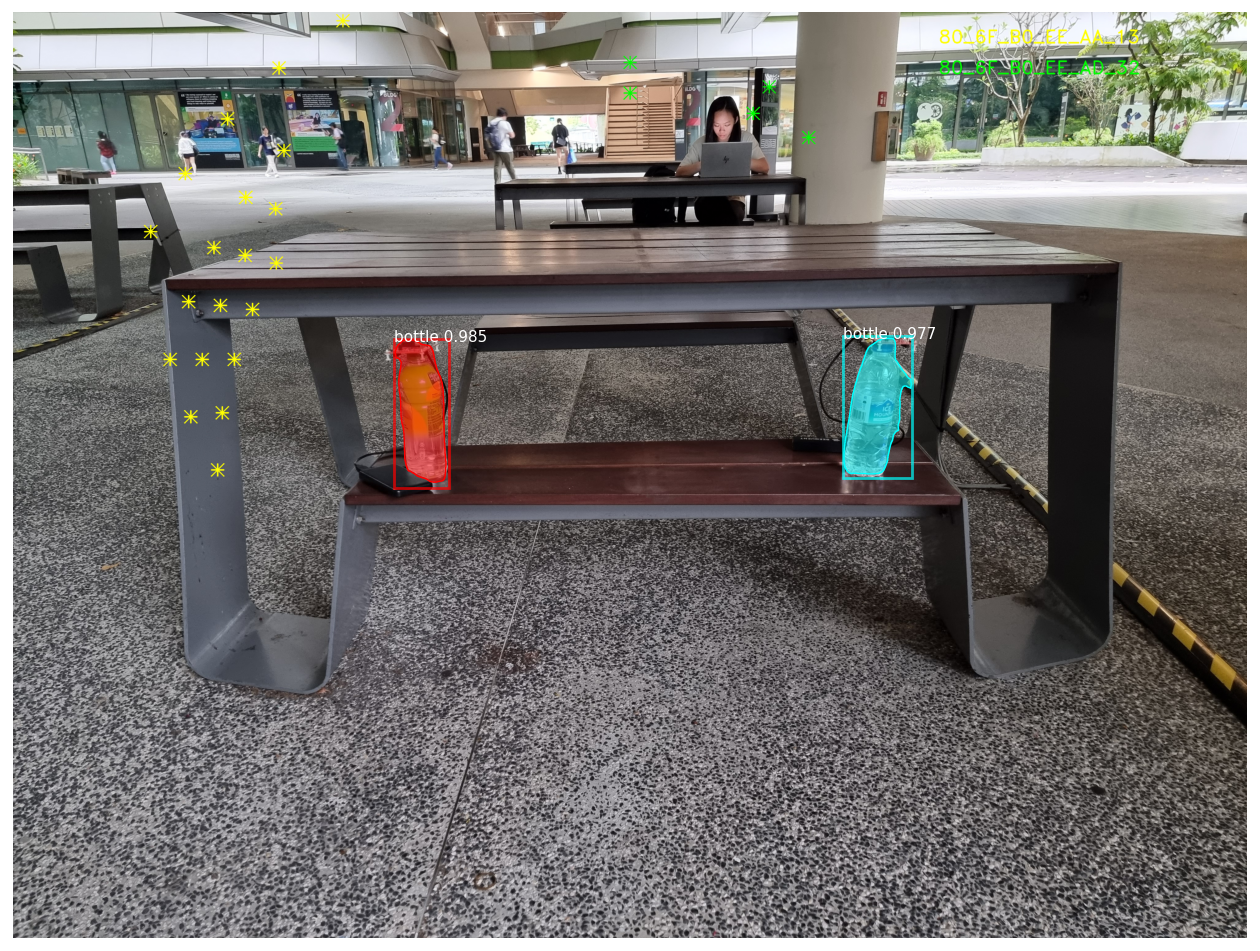

In [40]:
# # MANUAL 
file_name = 'two_top_outtest_67.jpg'
image = cv2.imread(os.path.join(IMG_DIR, file_name))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
results = model.detect([image], verbose=0)


data_dir = "./results/pixels/"
file_count = 0
colors = [[255,255,0],[0,255,0],[255,0,0],[0,0,255]]

for i in os.listdir(data_dir):
    file_count = file_count + 1
    xy = np.loadtxt(os.path.join(data_dir,i), delimiter=',')
    xy = xy.astype(int)
    color = colors[file_count-1]
    cv2.putText(image, i.split('.')[0], (image.shape[1]-1000, file_count*100),
                    cv2.FONT_HERSHEY_DUPLEX, 2, color, 2, cv2.LINE_AA)
    counter = 0
    for item in xy:
        cv2.drawMarker(image, (item[0], item[1]), color, markerType=cv2.MARKER_STAR,
                        markerSize=40, thickness=2, line_type=cv2.LINE_AA)
        counter += 1
    print(counter)
# Visualize results
r = results[0]
bottle_index = np.array([i for (i, item) in enumerate(r['class_ids']) if class_names[item]=='bottle' ])
mrcnn.visualize.display_instances(image, r['rois'][bottle_index], r['masks'][:,:,bottle_index],r['class_ids'][bottle_index] , 
                            class_names, r['scores'][bottle_index],save_fig_path = os.path.join(RESULTS_DIR,file_name))

### TO ORGANIZE

In [ ]:
data_dir = "./images/"
for i in os.listdir(data_dir):
    print(os.path.join(data_dir,i))
    image = skimage.io.imread(os.path.join(data_dir,i))
    results = model.detect([image],verbose = 0)
    r = results[0]

    with open("./logs/"+i+".pkl","wb") as fw:
        pickle.dump(results,fw)

In [ ]:
data_dir = "./images/"
for i in os.listdir(data_dir):
    print(os.path.join(data_dir,i))
    if(i.split('.')[-1]!='jpg'):
        break
    image = skimage.io.imread(os.path.join(data_dir,i))
    results = model.detect([image],verbose = 1)
    r = results[0]
    mrcnn.visualize.display_instances(image,r['rois'],r['masks'],r['class_ids'],class_names,r['scores'])
    masks = r['masks']
    for j in range(len(r['class_ids'])):
        if class_names[r['class_ids'][j]]=='bottle':
            answer = np.where(masks[:,:,j])
            answer = np.array(answer)
            file_name = './answer/'+i.split(".")[0]+"_"+str(r['scores'][j])+".csv"
            np.savetxt(file_name,answer.T,delimiter=",",fmt="%d")

In [ ]:
def dye_mask(img1, results, positions, output = './results/img_seg.jpg'):
    masks = results[0]['masks']
    scores = results[0]["scores"]
    num_objects = len(scores)
    final_score = np.zeros(num_objects)
    for i in range(num_objects):
        mask = masks[:,:,i]
        count = 0
        size = np.where(mask)[0].shape[0]
        for x, y in positions:
            if mask[y, x]:
                count += 1
            final_score[i] = count / size * scores[i]
    k = np.argmax(final_score)
    mask = masks[:,:,k]
    mask = np.where(mask,255,0).astype('uint8')
    mask = np.expand_dims(mask,axis=2)
    img0 = np.zeros(mask.shape).astype('uint8')
    mask = np.concatenate((img0,mask, img0), axis=-1)
    img4 = cv2.addWeighted(img1,1,mask,1,0)
    cv2.imwrite(output,img4)



def draw_mask(img_dir, AoA_dir, all_dir, final_dir, data_dir):
    image = skimage.io.imread(img_dir)
    positions = np.loadtxt(AoA_dir, delimiter=',').astype(int)
    # image = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
    results = model.detect([image],verbose=1)
    r = results[0]
    mrcnn.visualize.display_instances(image, r['rois'], 
                                      r['masks'], 
                                      r['class_ids'], 
                                      class_names, 
                                      r['scores'], 
                                      output_file=all_dir)
    masks = r['masks']
    scores = r['scores']
    num_objects = len(scores)
    final_score = np.zeros(num_objects)
    now_masks = []

    for i in range(num_objects):
        mask = masks[:,:,i]
        count = 0
        size = np.where(mask)[0].shape[0]
        for x, y in positions:
            if(x>=4032) or(x<0):
                continue
            if(y>3024) or (y<0):
                continue
            if mask[y,x]:
                count += 1
        
        final_score[i] = count/size * scores[i]
        now_masks.append(mask)
    
    k = np.argmax(final_score)
    mask = masks[:, :, k]
    r["final_mask"] = mask
    mask = np.where(mask, 255, 0).astype("uint8")
    mask = np.expand_dims(mask, axis=2)
    img0 = np.zeros(mask.shape).astype("uint8")
    mask = np.concatenate((img0, mask, img0), axis=-1)
    img4 = cv2.addWeighted(img1, 1, mask, 1, 0)
    cv2.imwrite(final_dir, img4)
    r["masks"] = now_masks
    r["final_score"] = final_score
    import pickle
    fr = open(data_dir,"wb")
    pickle.dump(r,fr)

In [ ]:
image = skimage.io.imread('./images/bottle.jpg')
image_ = cv2.imread('./images/bottle.jpg')
# positions = np.loadtxt('./answer/bottle_0.94845766.csv', delimiter=',').astype(int)
# dye_mask(image,results,positions)
print("Shapes: ",image.shape,"\t",image_.shape)

### IMAGE STITCHING

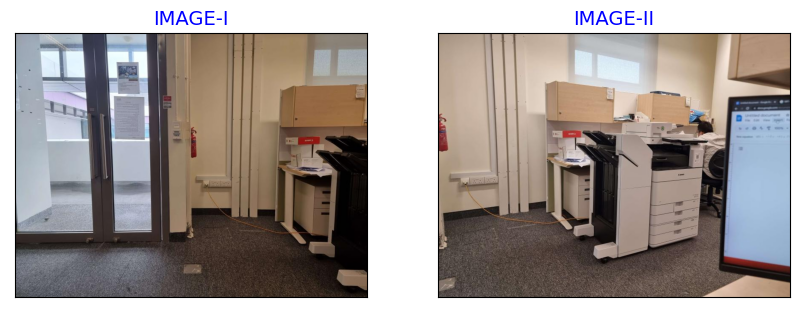

Number of Good Matches :  33


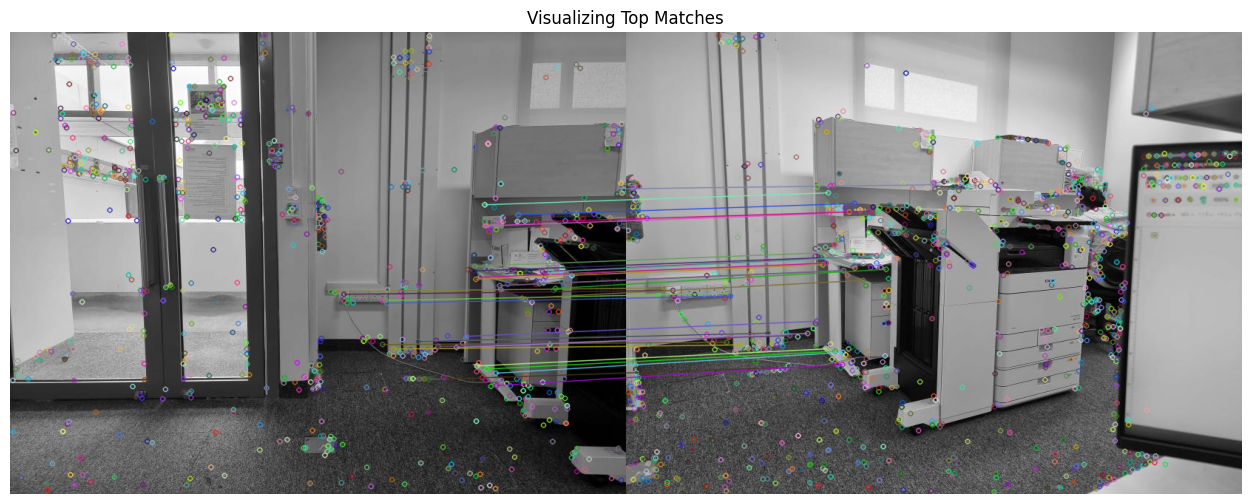

Number of Good Matches :  33


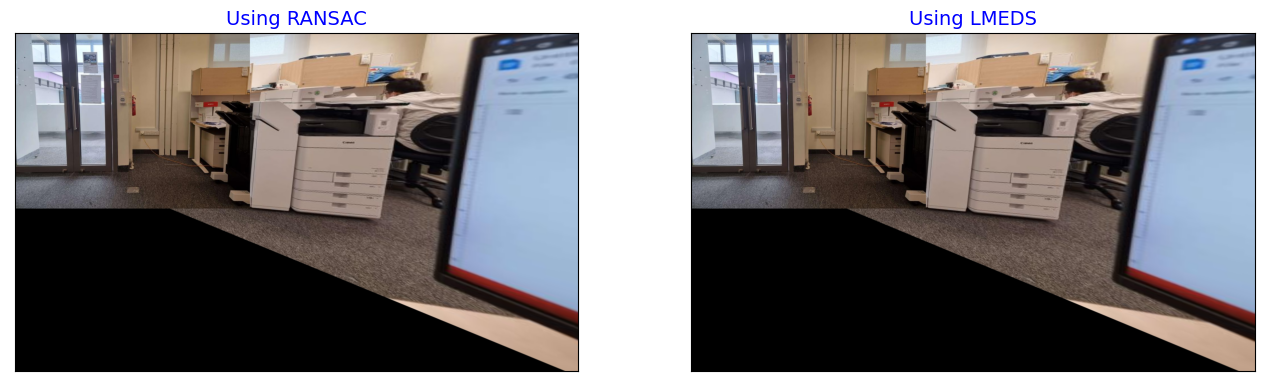

RANSAC HOMOGRAPHY: 
 [[ 4.60815878e+00  1.96119785e-01 -1.95716669e+03]
 [ 1.22734270e+00  3.75461450e+00 -8.28960325e+02]
 [ 4.35276970e-03  1.90591352e-04  1.00000000e+00]]
LMEDS HOMOGRAPHY: 
 [[ 4.54778230e+00  1.59099252e-01 -1.91771026e+03]
 [ 1.21219327e+00  3.67890773e+00 -8.07237200e+02]
 [ 4.33413595e-03  1.06111743e-04  1.00000000e+00]]


In [3]:
import cv2 as cv
from lib.visualizer import show_images
from lib.homography import find_homography
import numpy as np

im1 = './data/demo/stich_1.jpg'
im2 = './data/demo/stich_2.jpg'
## DEMO
d_im1 = cv.imread(im1)
d_im2 = cv.imread(im2)
show_images([[d_im1,'c',"IMAGE-I"],[d_im2,'c',"IMAGE-II"]])

# CHOICES {0-> LSM, cv.RANSAC, cv.RHO, cv.LMEDS}
H_ransac = find_homography(im1,im2,method=cv.RANSAC,verbose = True)         # RANSAC Approximation
H_lmeds  = find_homography(im1,im2)       # LMEDS Approximation


original_warped_ransac = cv.warpPerspective(d_im2, np.linalg.inv(H_ransac), (2000,1200))
original_warped_ransac[0:d_im1.shape[0], 0:d_im1.shape[1]] = d_im1

original_warped_lmeds = cv.warpPerspective(d_im2, np.linalg.inv(H_lmeds), (2000,1200))
original_warped_lmeds[0:d_im1.shape[0], 0:d_im1.shape[1]] = d_im1
show_images([[original_warped_ransac,'c',"Using RANSAC"],[original_warped_lmeds,'c',"Using LMEDS"]],size=8)
print("RANSAC HOMOGRAPHY: \n",H_ransac)
print("LMEDS HOMOGRAPHY: \n",H_lmeds)

### MASKOUT BOTTLES

In [10]:
from lib.homography import mask_out_images

DATA_DIR = './data/images_to_mask/'
RESULTS_DIR = './results/masked/'

mask_out_images(DATA_DIR, RESULTS_DIR)

./data/images_to_mask/translation21.jpg
Number of Objects Detected: 3
./data/images_to_mask/translation22.jpg
Number of Objects Detected: 3


### FINDING HOMOGRAPHY

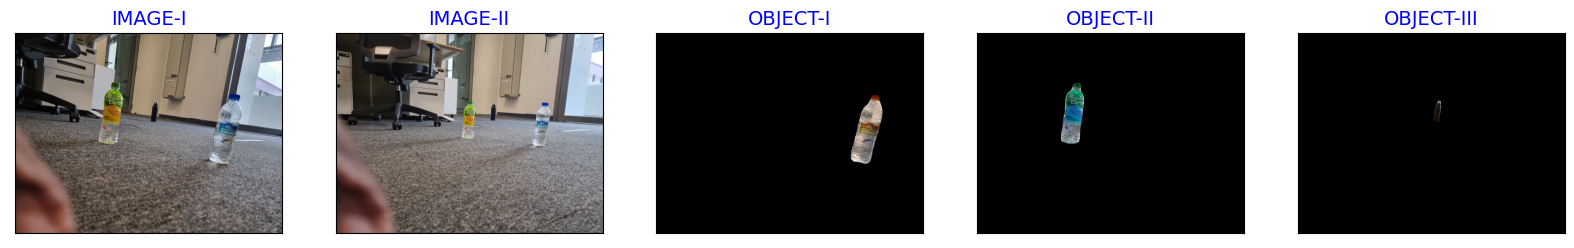

OBJECT - I
Number of Good Matches :  26
|H| = 0.028127631275216138 

OBJECT - II
Number of Good Matches :  54
|H| = 1.6693108186586403 

OBJECT - III
Number of Good Matches :  10
|H| = 0.06291973202856077 



In [14]:
from lib.visualizer import show_images
from lib.homography import find_homography
import numpy as np
import cv2 as cv

CASE = 'translation2'

file1 = f'./data/images_to_mask/{CASE}1.jpg'
file2 = f'./data/images_to_mask/{CASE}2.jpg'

mask1 = f'./results/masked/{CASE}1_1.jpg'
mask2 = f'./results/masked/{CASE}2_1.jpg'

mask3 =  f'./results/masked/{CASE}1_2.jpg'
mask4 =  f'./results/masked/{CASE}2_2.jpg'

mask5 =  f'./results/masked/{CASE}1_3.jpg'
mask6 =  f'./results/masked/{CASE}2_3.jpg'

show_images([[cv.imread(file1),'c',"IMAGE-I"],[cv.imread(file2),'c','IMAGE-II'],[cv.imread(mask1),'c','OBJECT-I'],[cv.imread(mask3),'c','OBJECT-II'],[cv.imread(mask5),'c','OBJECT-III']],size = 4) # 
# show_images([[cv.imread(mask2),'c','OBJECT-I'],[cv.imread(mask4),'c','OBJECT-II'],[cv.imread(mask6),'c','OBJECT-III']],size = 4)    #INSPECTION

try:
    print("OBJECT - I")
    H_1 = find_homography(mask1,mask2)                          # ,method=cv.RANSAC
    print("|H| =",abs(np.linalg.det(H_1)),'\n')
    print("OBJECT - II")
    H_2 = find_homography(mask3,mask4)                          # ,method = cv.RANSAC
    print("|H| =",abs(np.linalg.det(H_2)),'\n')
    print("OBJECT - III")
    H_3 = find_homography(mask5,mask6)                          # ,method = cv.RANSAC
    print("|H| =",abs(np.linalg.det(H_3)),'\n')
except:
    print("Not Enough Matches Found for Homography Calculation")
